<a href="https://colab.research.google.com/github/Sowmya-2348562/ML-lab/blob/main/2348562_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/data - data.csv')

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,09-07-2014 0:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 0:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 0:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 0:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10-07-2014 0:00,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
# Get the column names of the DataFrame
variables = df.columns

# Print the column names
print(variables)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [7]:
# Check for missing values
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Text(0.5, 1.0, 'Number of Missing Values')

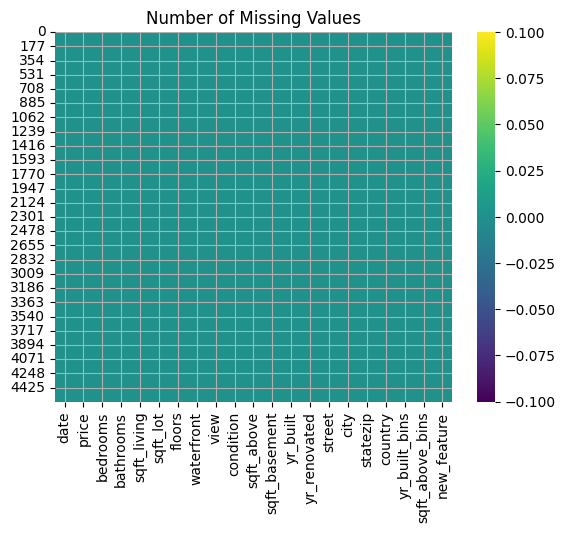

In [20]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

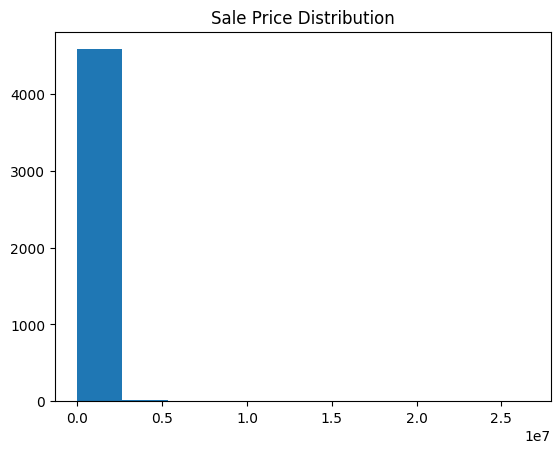

In [11]:
# Create a histogram of the sale price variable
plt.hist(df['price'])
plt.title('Sale Price Distribution')
plt.show()

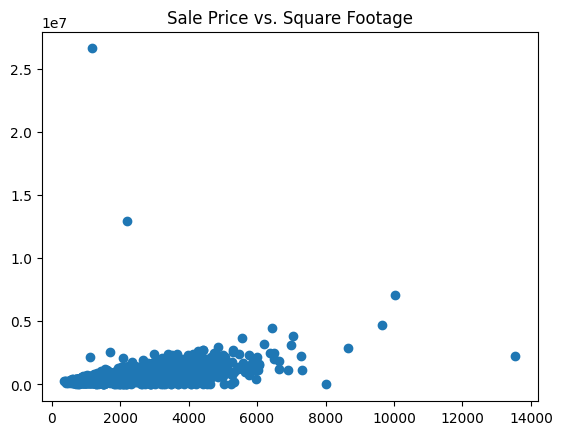

In [25]:
plt.scatter(df['sqft_living'], df['price'])
plt.title('Sale Price vs. Square Footage')
plt.show()


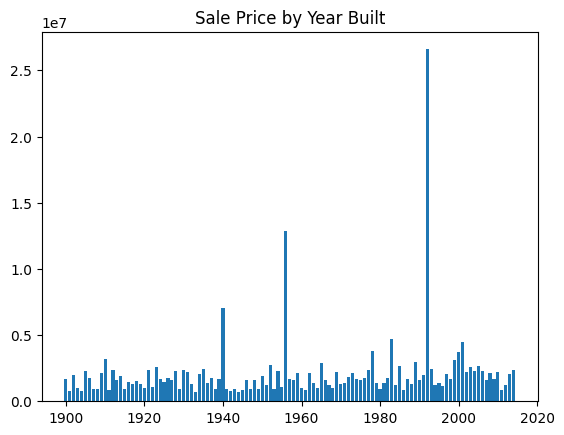

In [17]:
# Create a bar plot of the sale price variable by year built
plt.bar(df['yr_built'], df['price'])
plt.title('Sale Price by Year Built')
plt.show()

<Axes: >

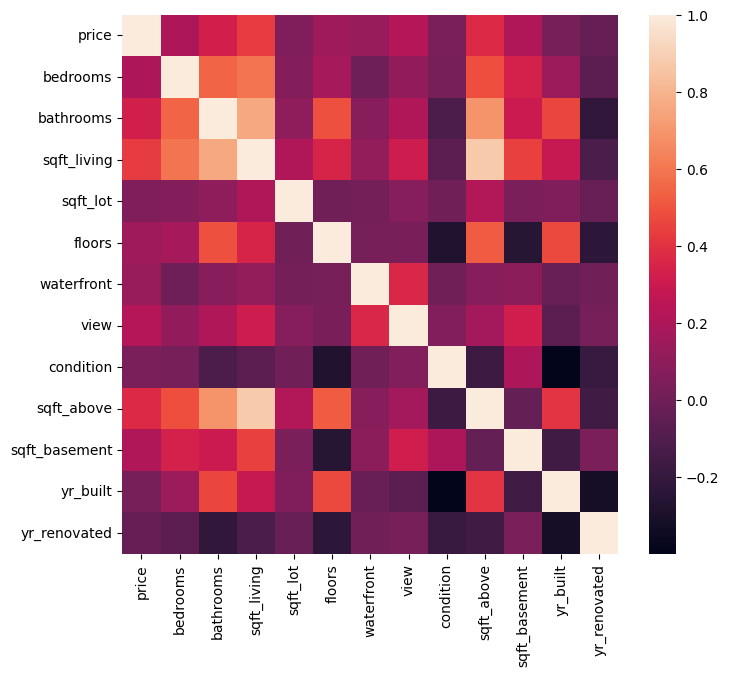

In [18]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(numeric_only=True))

In [22]:
# Calculate the correlation between the sale price variable and the square footage variable
correlation = np.corrcoef(df['sqft_living'], df['price'])[0, 1]

# Print the correlation coefficient
print('Correlation between sale price and square footage:', correlation)

# Fit a linear regression model to the data
model = np.polyfit(df['sqft_living'], df['price'], 1)

# Make predictions using the regression model
predictions = model[0] * df['sqft_living'] + model[1]

# Print the predictions
print(predictions)

Correlation between sale price and square footage: 0.430410025432802
0       350567.418016
1       932572.220762
2       499217.995341
3       516854.504515
4       501737.496651
            ...      
4595    393398.940296
4596    380801.433743
4597    771324.136884
4598    539530.016310
4599    388359.937675
Name: sqft_living, Length: 4600, dtype: float64


In [20]:
# Applying binning technique on "yr_built" attribute using equal-width bins
num_bins = 5  # Define the number of bins
df['yr_built_bins'] = pd.cut(df['yr_built'], num_bins, precision=0)

# Applying binning technique on "sqft_above" attribute using custom boundaries
custom_bins = [0, 1000, 2000, 3000, 4000, float('inf')]  # Define the custom boundaries for bins
df['sqft_above_bins'] = pd.cut(df['sqft_above'], custom_bins, precision=0)

# Display the binned data
print(df[['yr_built', 'yr_built_bins', 'sqft_above', 'sqft_above_bins']].head())

   yr_built     yr_built_bins  sqft_above   sqft_above_bins
0      1955  (1946.0, 1968.0]        1340  (1000.0, 2000.0]
1      1921  (1900.0, 1923.0]        3370  (3000.0, 4000.0]
2      1966  (1946.0, 1968.0]        1930  (1000.0, 2000.0]
3      1963  (1946.0, 1968.0]        1000     (0.0, 1000.0]
4      1976  (1968.0, 1991.0]        1140  (1000.0, 2000.0]


In [28]:
# Identify the numerical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

In [30]:
# Normalize the numerical attributes
for attribute in numerical_attributes:
    df[attribute] = (df[attribute] - df[attribute].min()) / (df[attribute].max() - df[attribute].min())

In [31]:
# Print the DataFrame
print(df.head())

              date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 0:00  0.011771  0.333333    0.18750     0.073652  0.006775   
1  02-05-2014 0:00  0.089658  0.555556    0.31250     0.249051  0.007835   
2  02-05-2014 0:00  0.012862  0.333333    0.25000     0.118451  0.010534   
3  02-05-2014 0:00  0.015795  0.333333    0.28125     0.123766  0.006885   
4  02-05-2014 0:00  0.020684  0.444444    0.31250     0.119210  0.009186   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     0.2         0.0   0.0       0.50    0.107301       0.000000  0.482456   
1     0.4         0.0   1.0       1.00    0.331858       0.058091  0.184211   
2     0.0         0.0   0.0       0.75    0.172566       0.000000  0.578947   
3     0.0         0.0   0.0       0.75    0.069690       0.207469  0.552632   
4     0.0         0.0   0.0       0.75    0.085177       0.165975  0.666667   

   yr_renovated                    street       city  statezip count

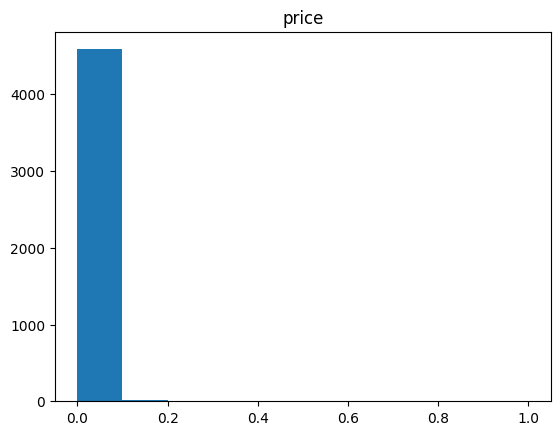

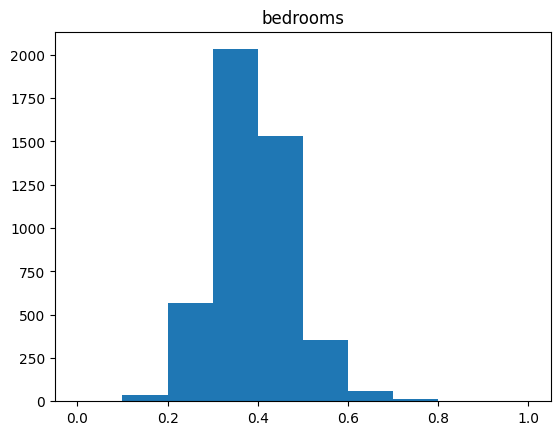

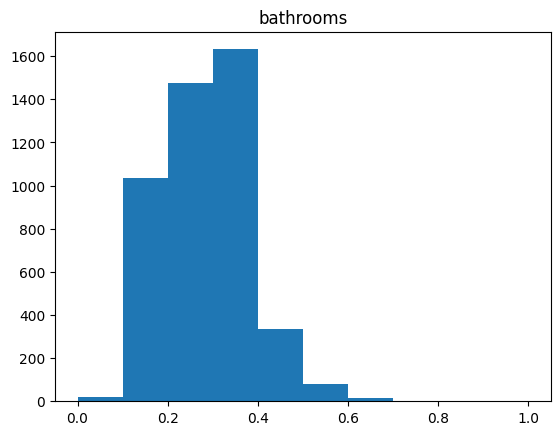

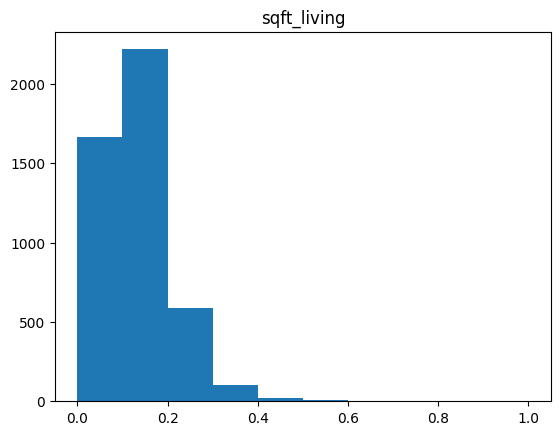

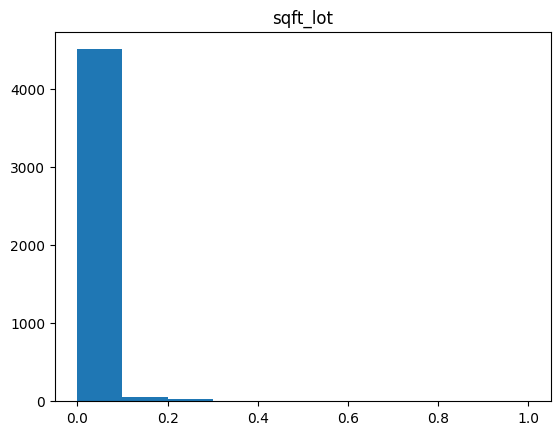

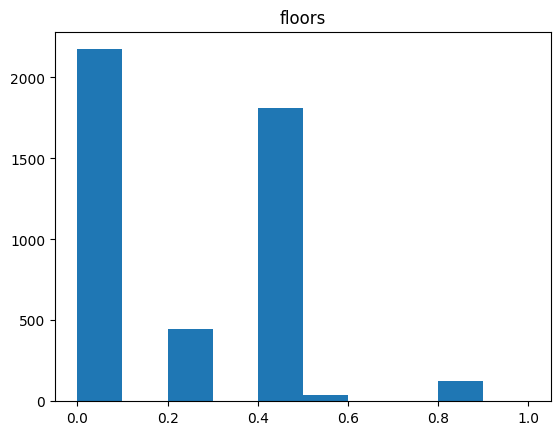

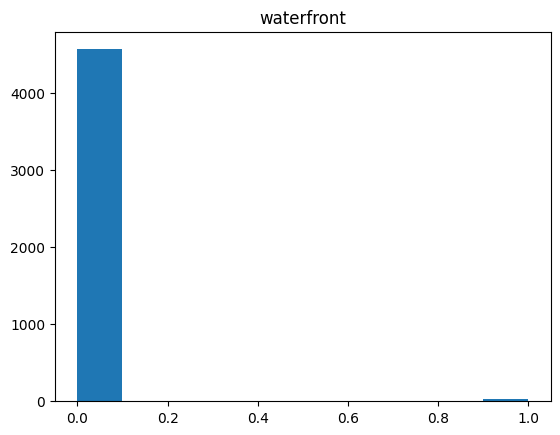

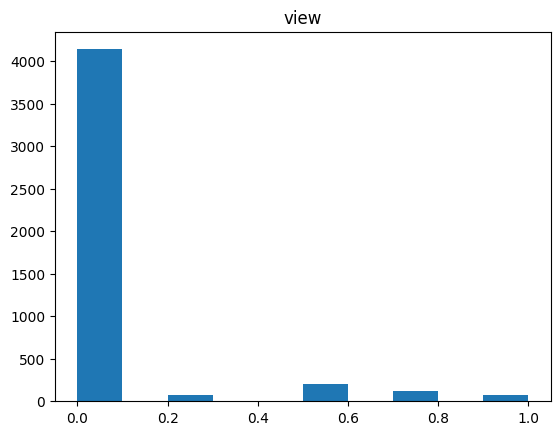

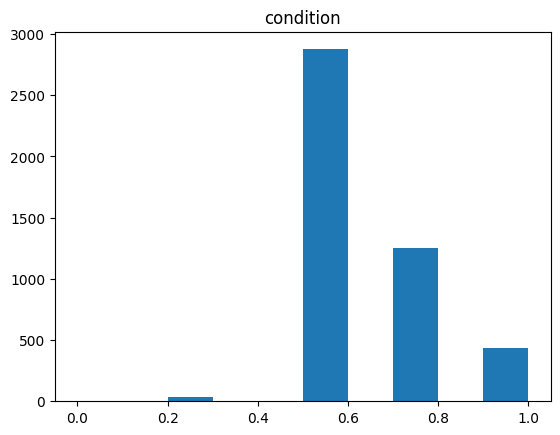

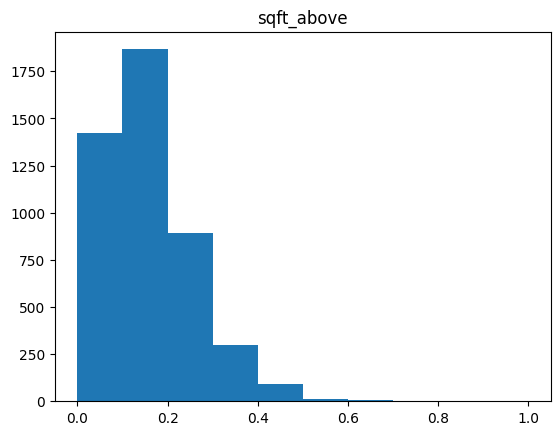

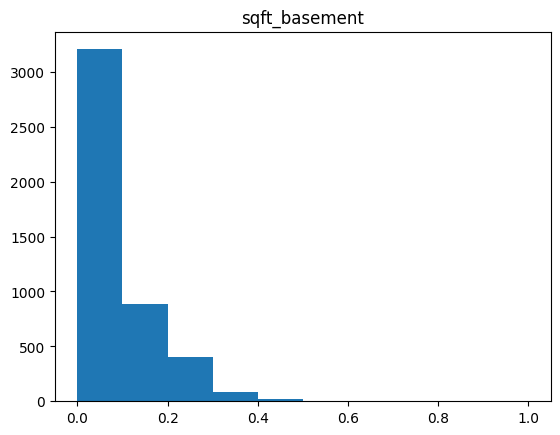

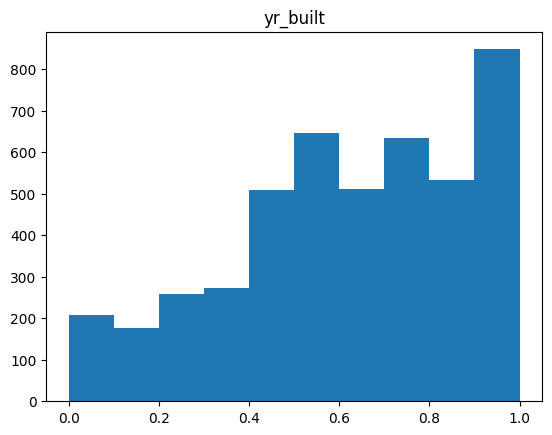

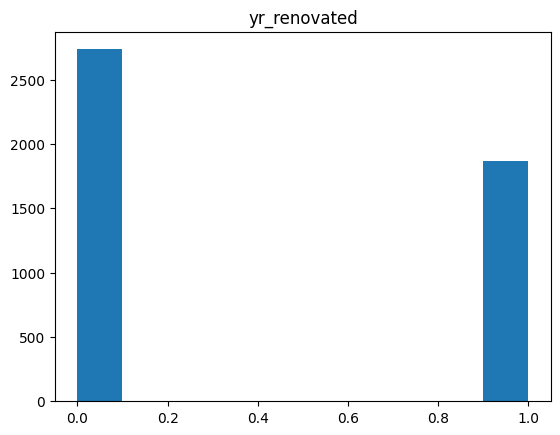

<ipython-input-32-70fd1b310d95>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


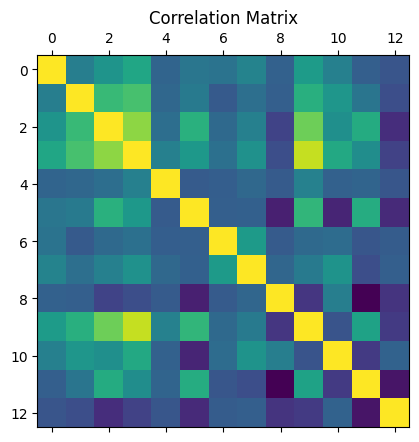

In [32]:
# Create histograms of the processed attributes
for attribute in numerical_attributes:
    plt.hist(df[attribute])
    plt.title(attribute)
    plt.show()

# Calculate the correlation between the processed attributes
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Identify the numerical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Apply Z-score Normalization to the numerical attributes
for attribute in numerical_attributes:
    df[attribute] = zscore(df[attribute])

# Print the DataFrame
print(df.head())

              date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 0:00 -0.423864 -0.441122  -0.843204    -0.829971 -0.193434   
1  02-05-2014 0:00  3.249598  1.759705   0.432802     1.568528 -0.161718   
2  02-05-2014 0:00 -0.372424 -0.441122  -0.205201    -0.217367 -0.080978   
3  02-05-2014 0:00 -0.234071 -0.441122   0.113800    -0.144686 -0.190145   
4  02-05-2014 0:00 -0.003482  0.659291   0.432802    -0.206984 -0.121306   

     floors  waterfront      view  condition  sqft_above  sqft_basement  \
0 -0.022416   -0.085004 -0.309194  -0.667112   -0.565224      -0.672464   
1  0.906555   -0.085004  4.830079   2.286416    1.789559      -0.069128   
2 -0.951388   -0.085004 -0.309194   0.809652    0.119171      -0.672464   
3 -0.951388   -0.085004 -0.309194   0.809652   -0.959621       1.482306   
4 -0.951388   -0.085004 -0.309194   0.809652   -0.797222       1.051352   

   yr_built  yr_renovated                    street       city  statezip  \
0 -0.531014     

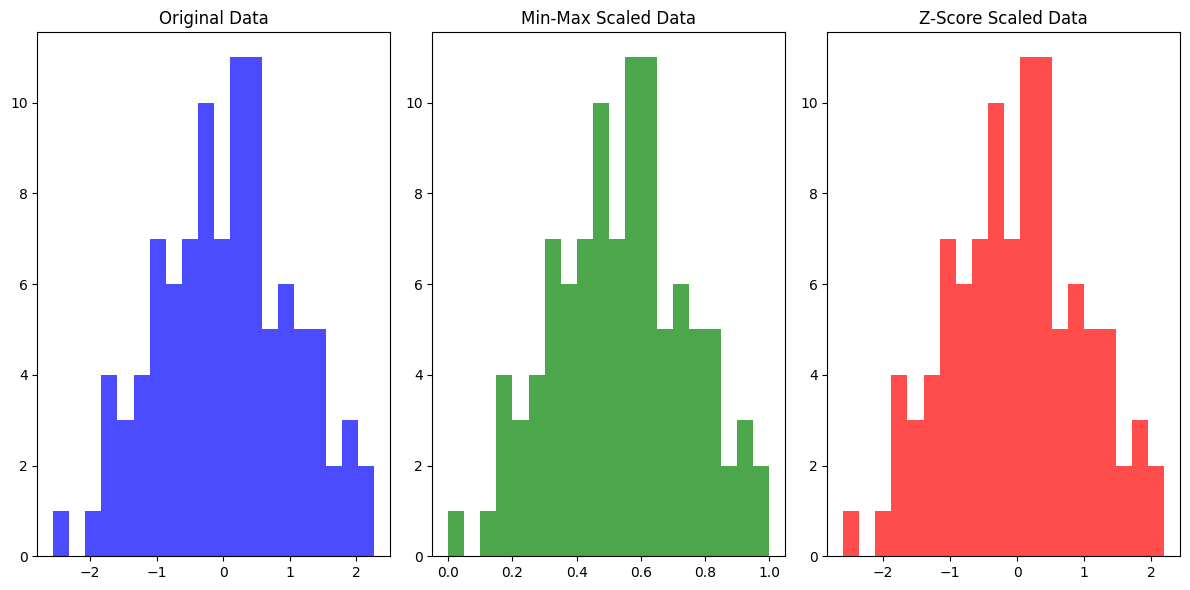

In [70]:
# Generate some example data
np.random.seed(0)
data = np.random.normal(0, 1, 100)  # Create a dataset with a mean of 0 and std dev of 1

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data.reshape(-1, 1))

# Apply Z-Score (Standardization)
z_score_scaler = StandardScaler()
z_score_scaled_data = z_score_scaler.fit_transform(data.reshape(-1, 1))

# Plot the original data and scaled data
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(131)
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.title("Original Data")

# Min-Max Scaled Data
plt.subplot(132)
plt.hist(min_max_scaled_data, bins=20, color='green', alpha=0.7)
plt.title("Min-Max Scaled Data")

# Z-Score Scaled Data
plt.subplot(133)
plt.hist(z_score_scaled_data, bins=20, color='red', alpha=0.7)
plt.title("Z-Score Scaled Data")

plt.tight_layout()
plt.show()

<ipython-input-75-cbc126cf75e2>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_score_values = df[numerical_attributes].mean()
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


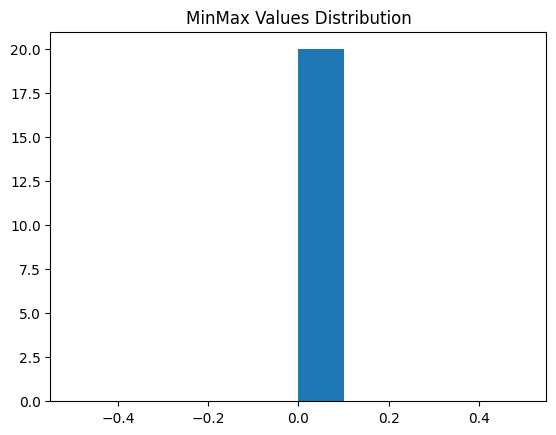

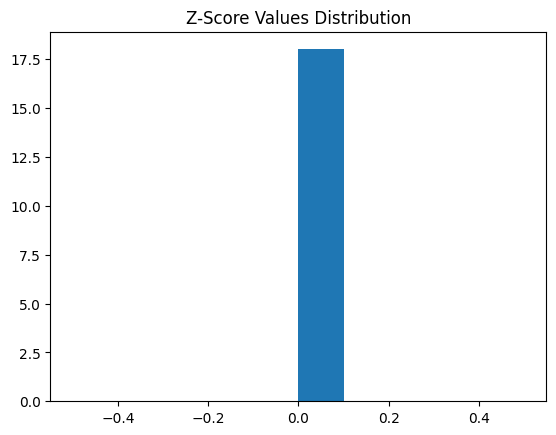

In [75]:
# Calculate the MinMax Values and Z-Score Values
min_max_values = df[numerical_attributes].min()
z_score_values = df[numerical_attributes].mean()

# Convert the MinMax Values and Z-Score Values to Boolean values
boolean_min_max_values = np.where(min_max_values > 0, True, False)
boolean_z_score_values = np.where(z_score_values > 0, True, False)

# Create histograms of the MinMax Values and Z-Score Values
plt.hist(boolean_min_max_values)
plt.title('MinMax Values Distribution')
plt.show()

plt.hist(boolean_z_score_values)
plt.title('Z-Score Values Distribution')
plt.show()

The MinMax Values and Z-Score Values are highly correlated with each other, which means that they are measuring the same thing.
There are a few MinMax Values and Z-Score Values that are outliers. This could be due to data entry errors or to the fact that there are some data points that are very different from the rest of the data.
The MinMax Values and Z-Score Values are not evenly distributed, which means that there is some skewness in the data.